## Visualizing Historical Sea Ice and Climate Trends in the Southern Ocean

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas
import folium

In [125]:
climate_df = pd.read_csv("A historical Southern Ocean climate dataset from whaling ships' logbooks.csv", low_memory = False)

whale_df = pd.read_csv("Bjorge_et_al_catchlogbook_whaling_weather_data_1932-63_data_publication.csv")

### Preprocessing data

In [126]:
whale_df = whale_df.drop(columns=[f'Unnamed: {i}' for i in range(17,24)], axis = 1)
whale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6281 entries, 0 to 6280
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ship             6281 non-null   object 
 1   date             6281 non-null   object 
 2   Latitude         6281 non-null   float64
 3   Longitude        6281 non-null   float64
 4   Temp (air)       6133 non-null   float64
 5   Temp (sea)       4950 non-null   float64
 6   mBar             6281 non-null   float64
 7   Weather          6206 non-null   object 
 8   Wind             6266 non-null   object 
 9   Strength (Wind)  6251 non-null   float64
 10  Sea (Waves)      6176 non-null   float64
 11  Ice              6042 non-null   object 
 12  Blue Whales      4288 non-null   float64
 13  Finn Whales      5104 non-null   float64
 14  Humpback Whale   2115 non-null   float64
 15  Sperm Whales     6128 non-null   float64
 16  Sei Whale        1144 non-null   float64
dtypes: float64(12)

In [127]:
climate_df['date'] = pd.to_datetime(
    climate_df[['YR', 'MO', 'DY']].rename(columns={'YR': 'year', 'MO': 'month', 'DY': 'day'}),
    errors='coerce'
)

### 1. Time series plots of whale catches

In [128]:
# Convert the date column to datetime format
whale_df['date'] = pd.to_datetime(whale_df['date'])

whale_species = ['Blue Whales', 'Finn Whales', 'Humpback Whale', 'Sperm Whales', 'Sei Whale']

whale_counts_df = whale_df.groupby(whale_df['date'].dt.year)[whale_species].sum()


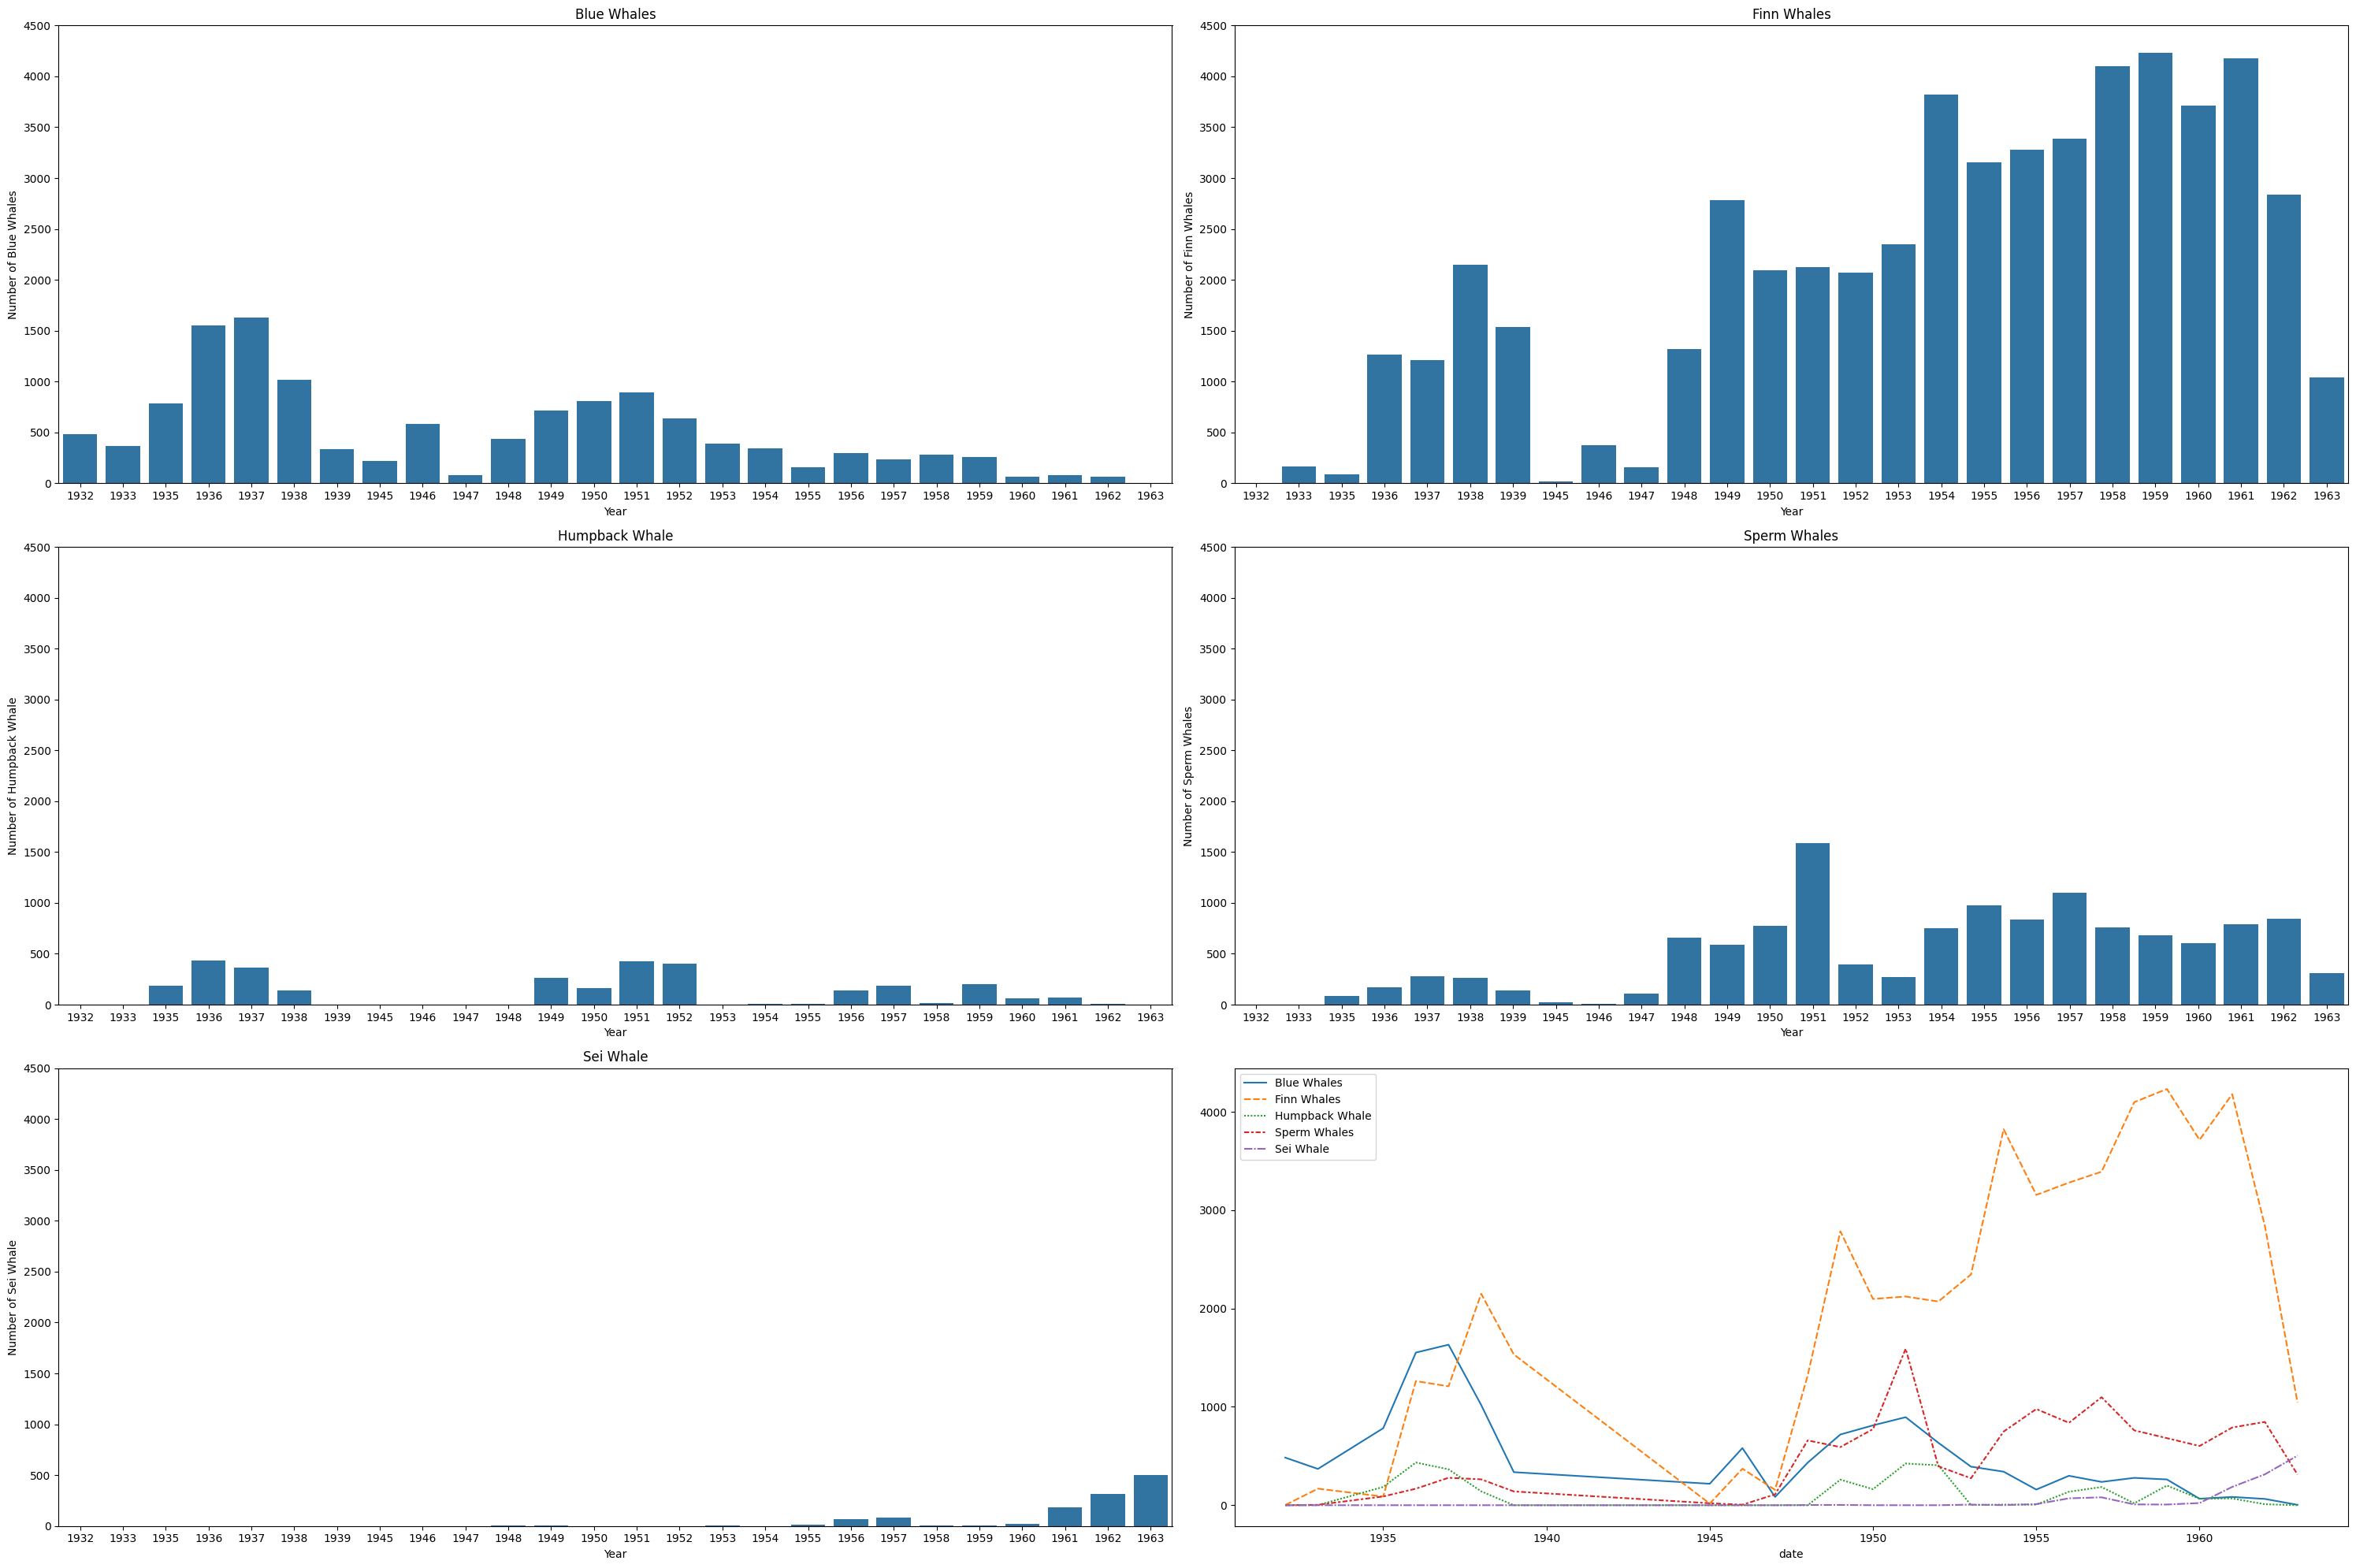

In [129]:
fig, ax = plt.subplots(3,2,figsize=(30,20))
ax = ax.flatten()
for idx, species in enumerate(whale_species):
    sns.barplot(ax=ax[idx], x=whale_counts_df.index, y=whale_counts_df[species].values)
    ax[idx].set_title(species)
    ax[idx].set_xlabel("Year")
    ax[idx].set_ylabel(f"Number of {species}")
    ax[idx].set_ylim(0,4500)

sns.lineplot(ax=ax[5], data = whale_counts_df)
plt.tight_layout()
plt.show()

###  Map Ship Tracks and Observations

In [130]:
fig = px.scatter_geo(
    climate_df,
    lat='LAT',
    lon='LON',
    color='SST',  # Optional: color by temperature
    color_continuous_scale='RdBu_r', 
    hover_name='SST',  # Optional: what shows up when you hover
    hover_data={'date': True, 'LAT': True, 'LON': True, 'SST': ':.2f'},
    projection='natural earth',
    title='Ship Tracks with Sea Surface Temperature'
)


fig.show()